In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from get_processed_data import get_processed_data
import seaborn as sns
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from sampling import undersample, oversample, smote, ncr
from show_metrics import show_metrics_DL
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)
from feature_selection import forward_select, backward_select, rf_select

### Splitting data

In [2]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()
# X_train.to_csv(r"C:\Users\760421\Downloads\P_FAILING_HEAD.csv", index=False)


Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


In [3]:
def ann(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(57,)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


def train_ann(X_train, y_train, X_test, y_test, sampling_technique):

    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)




Epoch 1/30


386/386 [==============================] - 1s 1ms/step - loss: 0.2450 - accuracy: 0.9330
Epoch 2/30
386/386 [==============================] - 0s 982us/step - loss: 0.2042 - accuracy: 0.9413
Epoch 3/30
386/386 [==============================] - 0s 940us/step - loss: 0.1982 - accuracy: 0.9413
Epoch 4/30
386/386 [==============================] - 0s 945us/step - loss: 0.1953 - accuracy: 0.9413
Epoch 5/30
386/386 [==============================] - 0s 940us/step - loss: 0.1924 - accuracy: 0.9413
Epoch 6/30
386/386 [==============================] - 0s 935us/step - loss: 0.1909 - accuracy: 0.9413
Epoch 7/30
386/386 [==============================] - 0s 930us/step - loss: 0.1896 - accuracy: 0.9413
Epoch 8/30
386/386 [==============================] - 0s 935us/step - loss: 0.1884 - accuracy: 0.9413
Epoch 9/30
386/386 [==============================] - 0s 932us/step - loss: 0.1873 - accuracy: 0.9413
Epoch 10/30
386/386 [==============================] - 0s 925us/step - loss: 0.1

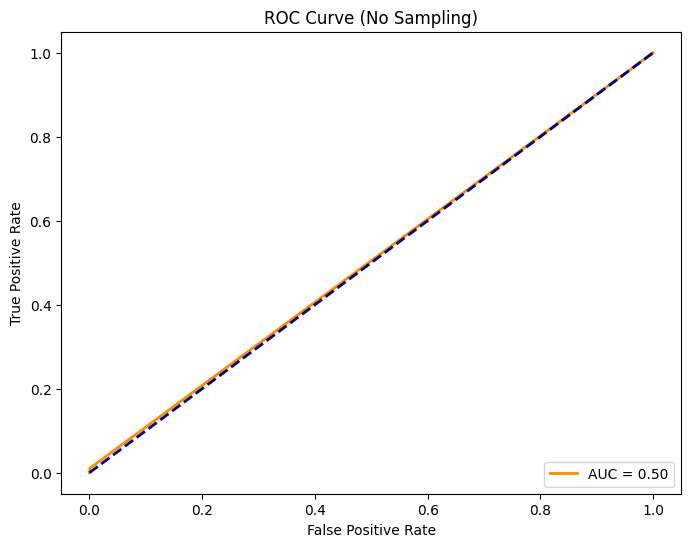

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 993us/step - loss: 0.5515 - accuracy: 0.7355
Epoch 2/30
726/726 [==============================] - 1s 986us/step - loss: 0.4940 - accuracy: 0.7646
Epoch 3/30
726/726 [==============================] - 1s 986us/step - loss: 0.4774 - accuracy: 0.7705
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4631 - accuracy: 0.7768
Epoch 5/30
726/726 [==============================] - 1s 999us/step - loss: 0.4500 - accuracy: 0.7850
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4366 - accuracy: 0.7902
Epoch 7/30
726/726 [==============================] - 1s 970us/step - loss: 0.4263 - accuracy: 0.7968
Epoch 8/30
726/726 [==============================] - 1s 953us/step - loss: 0.4174 - accuracy: 0.8039
Epoch 9/30
726/726 [==============================] - 1s 939us/step - loss: 0.4085 - accuracy: 0.8079
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.3998 - accuracy: 0.8

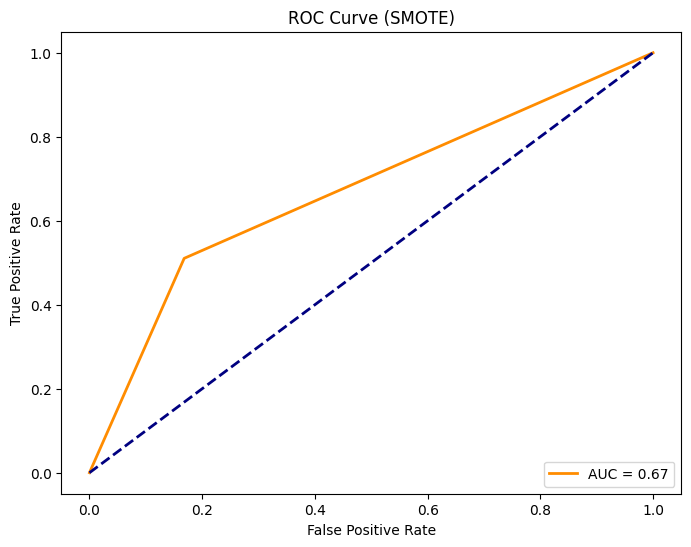

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 964us/step - loss: 0.5785 - accuracy: 0.7103
Epoch 2/30
726/726 [==============================] - 1s 947us/step - loss: 0.5078 - accuracy: 0.7554
Epoch 3/30
726/726 [==============================] - 1s 954us/step - loss: 0.4841 - accuracy: 0.7655
Epoch 4/30
726/726 [==============================] - 1s 938us/step - loss: 0.4678 - accuracy: 0.7739
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4558 - accuracy: 0.7837
Epoch 6/30
726/726 [==============================] - 1s 939us/step - loss: 0.4464 - accuracy: 0.7879
Epoch 7/30
726/726 [==============================] - 1s 952us/step - loss: 0.4388 - accuracy: 0.7928
Epoch 8/30
726/726 [==============================] - 1s 942us/step - loss: 0.4325 - accuracy: 0.7958
Epoch 9/30
726/726 [==============================] - 1s 955us/step - loss: 0.4267 - accuracy: 0.8019
Epoch 10/30
726/726 [==============================] - 1s 954us/step - loss: 0.4213 - accuracy:

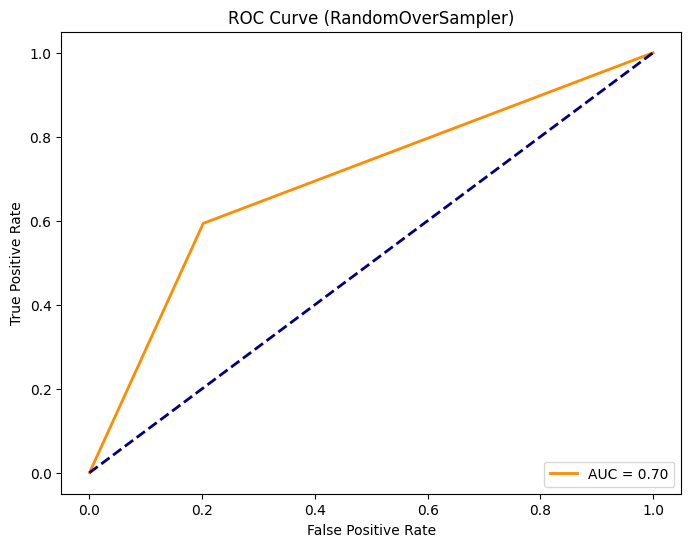

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.5076
Epoch 2/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.5939
Epoch 3/30
46/46 [==============================] - 0s 1000us/step - loss: 0.6358 - accuracy: 0.6443
Epoch 4/30
46/46 [==============================] - 0s 978us/step - loss: 0.6128 - accuracy: 0.6678
Epoch 5/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.6851
Epoch 6/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5797 - accuracy: 0.7037
Epoch 7/30
46/46 [==============================] - 0s 956us/step - loss: 0.5628 - accuracy: 0.7175
Epoch 8/30
46/46 [==============================] - 0s 933us/step - loss: 0.5528 - accuracy: 0.7355
Epoch 9/30
46/46 [==============================] - 0s 956us/step - loss: 0.5428 - accuracy: 0.7383
Epoch 10/30
46/46 [==============================] - 0s 956us/step - loss: 0.5340 - accuracy: 0.7583
Epoch 11/30
46/46

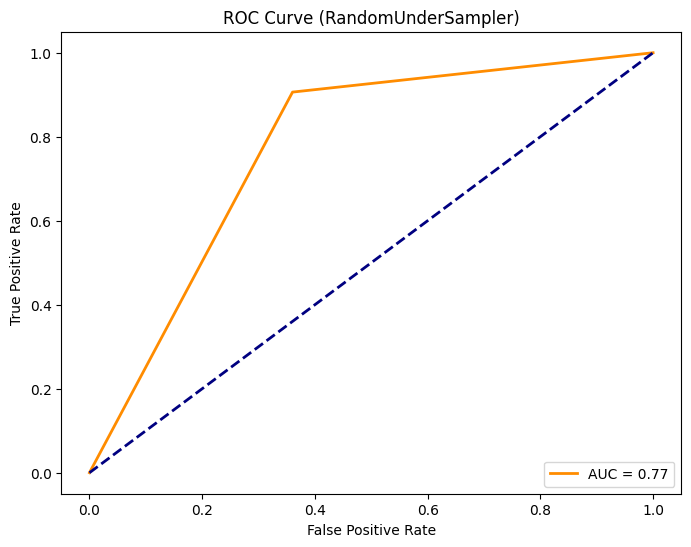

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


337/337 [==============================] - 1s 1ms/step - loss: 0.2584 - accuracy: 0.9325
Epoch 2/30
337/337 [==============================] - 0s 982us/step - loss: 0.2153 - accuracy: 0.9327
Epoch 3/30
337/337 [==============================] - 0s 970us/step - loss: 0.2065 - accuracy: 0.9328
Epoch 4/30
337/337 [==============================] - 0s 958us/step - loss: 0.2009 - accuracy: 0.9325
Epoch 5/30
337/337 [==============================] - 0s 952us/step - loss: 0.1982 - accuracy: 0.9324
Epoch 6/30
337/337 [==============================] - 0s 940us/step - loss: 0.1961 - accuracy: 0.9323
Epoch 7/30
337/337 [==============================] - 0s 946us/step - loss: 0.1945 - accuracy: 0.9325
Epoch 8/30
337/337 [==============================] - 0s 1ms/step - loss: 0.1931 - accuracy: 0.9323
Epoch 9/30
337/337 [==============================] - 0s 940us/step - loss: 0.1909 - accuracy: 0.9322
Epoch 10/30
337/337 [==============================] - 0s 926us/step - loss: 0.1901 - accuracy: 0

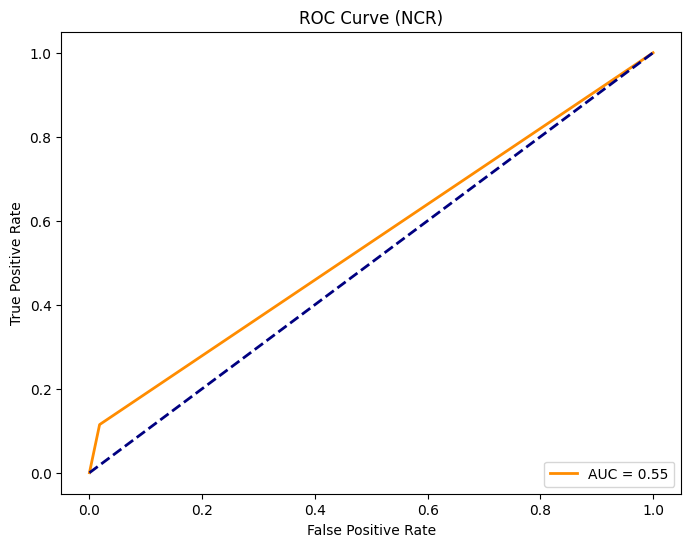

In [4]:
results={}

#No Sampling
metrics = train_ann(X_train,y_train, X_val,y_val,'No Sampling')
results[metrics[0]] = metrics[1:]

#smote
X_smote, y_smote = smote(X_train, y_train)

metrics = train_ann(X_smote, y_smote, X_val,y_val,'SMOTE')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train, y_train)

metrics = train_ann(X_over, y_over, X_val,y_val,'RandomOverSampler')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train, y_train)

metrics = train_ann(X_under, y_under, X_val,y_val,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

#ncr
X_ncr, y_ncr = ncr(X_train, y_train)
metrics = train_ann(X_ncr, y_ncr, X_val,y_val,'NCR')
results[metrics[0]] = metrics[1:]

In [5]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision',  'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler,0.906,0.143,0.247,0.656
RandomOverSampler,0.594,0.163,0.256,0.785
SMOTE,0.510,0.168,0.253,0.812
NCR,0.115,0.297,0.165,0.928
No Sampling,0.010,0.500,0.020,0.938


```Feature Selection```

In [6]:
# model= KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
#                             hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)

# for_features = forward_select(model, X_train, y_train)

# back_features = backward_select(model, X_train, y_train)

# rf_features = rf_select(X_train, y_train)

# print("Best forward select features: " + for_features)
# print("Best back select features: " + back_features)
# print("Best rf select features: " + rf_features)

```Hyper-Parameter Tuning```

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score


# Create a KerasClassifier for use in GridSearchCV
model = KerasClassifier(build_fn=ann, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001,0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30,40],  # Number of training epochs
    'dropout_rate': [0.0, 0.1,0.2],
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(recall_score), cv=3)
grid_result = grid.fit(X_over, y_over)

# Print the best parameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Err

Best: 0.954354 using {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 40, 'hidden_units': 32, 'learning_rate': 0.01, 'optimizer': 'adam'}


In [11]:

def train_ann_tuned(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

    # model = KerasClassifier(build_fn=ann, epochs=10)
    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', 
                            dropout_rate=0.1, 
                            hidden_units=32, learning_rate=0.01, batch_size=32, epochs=40)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train, class_weight=class_weights)
    # model.fit(X_train, y_train, epochs=30, batch_size=32,class_weight=class_weights)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

Epoch 1/40


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


386/386 [==============================] - 1s 1ms/step - loss: 0.2392 - accuracy: 0.9346
Epoch 2/40
386/386 [==============================] - 0s 1ms/step - loss: 0.2061 - accuracy: 0.9413
Epoch 3/40
386/386 [==============================] - 0s 1ms/step - loss: 0.2015 - accuracy: 0.9413
Epoch 4/40
386/386 [==============================] - 0s 1ms/step - loss: 0.1956 - accuracy: 0.9413
Epoch 5/40
386/386 [==============================] - 0s 1ms/step - loss: 0.1919 - accuracy: 0.9413
Epoch 6/40
386/386 [==============================] - 0s 1ms/step - loss: 0.1917 - accuracy: 0.9412
Epoch 7/40
386/386 [==============================] - 0s 1ms/step - loss: 0.1888 - accuracy: 0.9412
Epoch 8/40
386/386 [==============================] - 0s 1ms/step - loss: 0.1883 - accuracy: 0.9413
Epoch 9/40
386/386 [==============================] - 0s 1ms/step - loss: 0.1881 - accuracy: 0.9413
Epoch 10/40
386/386 [==============================] - 0s 1ms/step - loss: 0.1861 - accuracy: 0.9413
Epoch 11/4

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

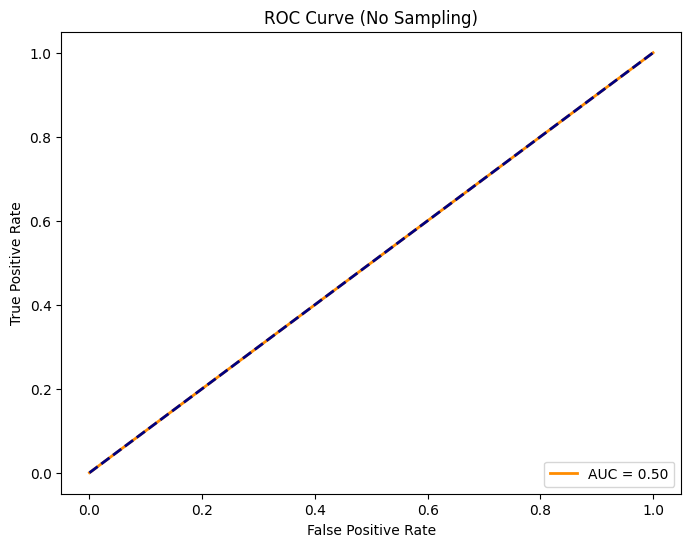

Epoch 1/40


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.5717 - accuracy: 0.7152
Epoch 2/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4995 - accuracy: 0.7657
Epoch 3/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4717 - accuracy: 0.7761
Epoch 4/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4522 - accuracy: 0.7860
Epoch 5/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4389 - accuracy: 0.7958
Epoch 6/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4276 - accuracy: 0.8029
Epoch 7/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8069
Epoch 8/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4084 - accuracy: 0.8122
Epoch 9/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4014 - accuracy: 0.8181
Epoch 10/40
726/726 [==============================] - 1s 1ms/step - loss: 0.3935 - accuracy: 0.8203
Epoch 11/4

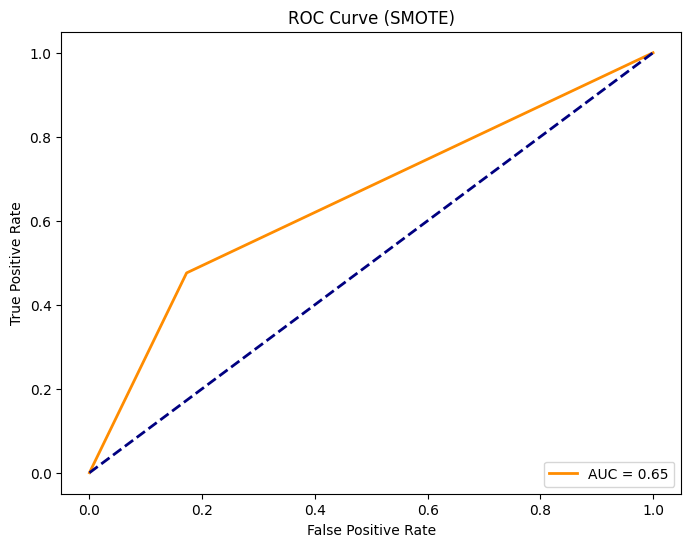

Epoch 1/40


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.5593 - accuracy: 0.7224
Epoch 2/40
726/726 [==============================] - 1s 1ms/step - loss: 0.5027 - accuracy: 0.7553
Epoch 3/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4757 - accuracy: 0.7723
Epoch 4/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4547 - accuracy: 0.7825
Epoch 5/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4400 - accuracy: 0.7905
Epoch 6/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4269 - accuracy: 0.7993
Epoch 7/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4176 - accuracy: 0.8058
Epoch 8/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4099 - accuracy: 0.8082
Epoch 9/40
726/726 [==============================] - 1s 1ms/step - loss: 0.4020 - accuracy: 0.8119
Epoch 10/40
726/726 [==============================] - 1s 1ms/step - loss: 0.3972 - accuracy: 0.8176
Epoch 11/4

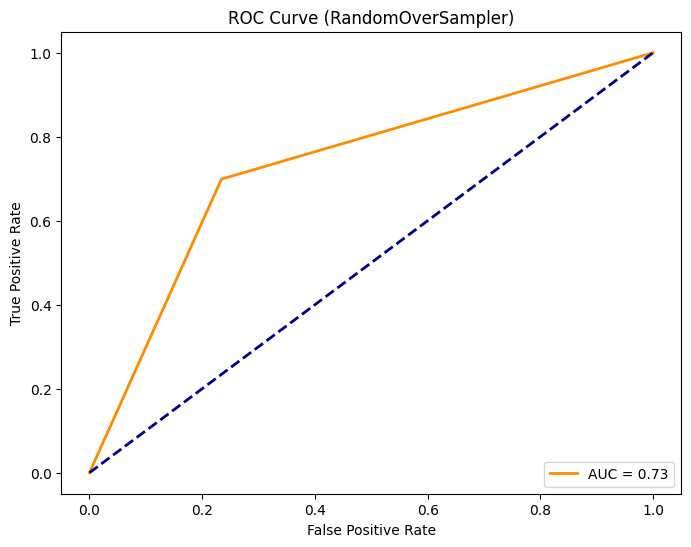

Epoch 1/40


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 1ms/step - loss: 0.6665 - accuracy: 0.5953
Epoch 2/40
46/46 [==============================] - 0s 1ms/step - loss: 0.6206 - accuracy: 0.6685
Epoch 3/40
46/46 [==============================] - 0s 1ms/step - loss: 0.5909 - accuracy: 0.7044
Epoch 4/40
46/46 [==============================] - 0s 1ms/step - loss: 0.5629 - accuracy: 0.7251
Epoch 5/40
46/46 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.7300
Epoch 6/40
46/46 [==============================] - 0s 1ms/step - loss: 0.5379 - accuracy: 0.7396
Epoch 7/40
46/46 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.7459
Epoch 8/40
46/46 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.7514
Epoch 9/40
46/46 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.7535
Epoch 10/40
46/46 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.7610
Epoch 11/40
46/46 [===========

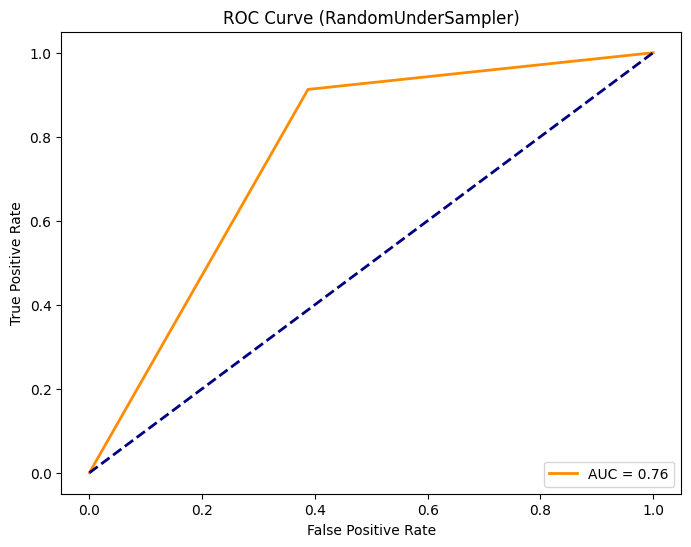

Epoch 1/40


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


337/337 [==============================] - 1s 1ms/step - loss: 0.2834 - accuracy: 0.9082
Epoch 2/40
337/337 [==============================] - 0s 1ms/step - loss: 0.2228 - accuracy: 0.9327
Epoch 3/40
337/337 [==============================] - 0s 1ms/step - loss: 0.2105 - accuracy: 0.9325
Epoch 4/40
337/337 [==============================] - 0s 1ms/step - loss: 0.2042 - accuracy: 0.9323
Epoch 5/40
337/337 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 0.9320
Epoch 6/40
337/337 [==============================] - 0s 1ms/step - loss: 0.2003 - accuracy: 0.9324
Epoch 7/40
337/337 [==============================] - 0s 1ms/step - loss: 0.1970 - accuracy: 0.9329
Epoch 8/40
337/337 [==============================] - 0s 1ms/step - loss: 0.1961 - accuracy: 0.9316
Epoch 9/40
337/337 [==============================] - 0s 1ms/step - loss: 0.1947 - accuracy: 0.9327
Epoch 10/40
337/337 [==============================] - 0s 1ms/step - loss: 0.1937 - accuracy: 0.9332
Epoch 11/4

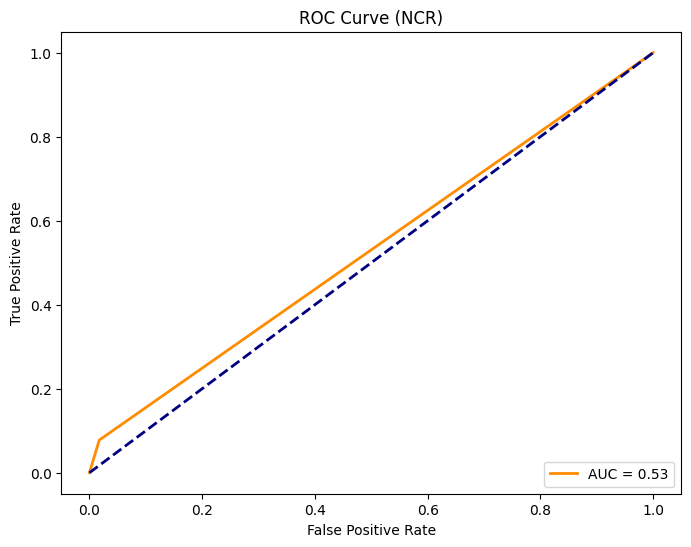

In [12]:
results={}

#No Sampling
metrics = train_ann_tuned(X_train,y_train,X_test,y_test,'No Sampling')
results[metrics[0]] = metrics[1:]

#smote
X_smote, y_smote = smote(X_train, y_train)

metrics = train_ann_tuned(X_smote, y_smote, X_test, y_test,'SMOTE')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train, y_train)

metrics = train_ann_tuned(X_over, y_over, X_test, y_test,'RandomOverSampler')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train, y_train)

metrics = train_ann_tuned(X_under, y_under, X_test, y_test,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

#ncr
X_ncr, y_ncr = ncr(X_train, y_train)

metrics = train_ann_tuned(X_ncr, y_ncr, X_test, y_test,'NCR')
results[metrics[0]] = metrics[1:]

In [13]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomOverSampler,0.699,0.176,0.281,0.761
RandomUnderSampler,0.913,0.144,0.249,0.632
SMOTE,0.476,0.165,0.245,0.804
NCR,0.078,0.242,0.118,0.922
No Sampling,0.000,0.000,0.000,0.933
